### Load data set with features

In [6]:
from create_df import read_df
df, dfc, all_homes, appliance_min, national_average = read_df()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 26 days


In [2]:
run all_functions.py

In [3]:
run features.py

In [4]:
appliance_name_map = {"fridge":"Fridge","hvac":"HVAC","wm":"Washing\nmachine",
                      "dr":"Dryer","dw":"Dish\nwasher","light":"Lights"}
import json

### TRAIN ACCURACY

In [8]:
import json
appliances = ["dr","hvac","wm","dw","fridge","light"]
features = ["Static", "Monthly", "Monthly+Static"]
#features=["AMI+Static"]
#features=["All"]
#appliances=["fridge","hvac","dr","dw"]
#features = feature_map.keys()
out={}
means = {}
sems = {}
for feature in features:
    out[feature]={}
    means[feature]={}
    sems[feature]={}
    for appliance in appliances:
    
        out[feature][appliance] = {}
        for home in all_homes[appliance]:
            try:
                j = json.load(open("../main-out-new/%s_%s_%d.json" %(appliance, feature, home),'r'))
                out[feature][appliance][int(home)] = j['accuracy']
            except:
                pass
                                     
                
           
train_df = pd.DataFrame({k:pd.DataFrame(out[k]).mean() for k in features})


In [9]:
to_use_feature = {}
for appliance in ["dr","hvac","wm","dw","fridge","light"]:
    to_use_feature[appliance] = train_df.ix[appliance].argmax()

### TEST

In [10]:
from constants import APPROACH as APPROACH_NAME

In [11]:
appliances = ["dr","hvac","wm","dw","fridge","light"]
#features = ["Static","Monthly", "Monthly+Static"]
#features=["AMI+Static"]

#features=["All"]
out={}
means = {}
sems = {}

for appliance in appliances:
    feature=to_use_feature[appliance]
    

    out[appliance] = {}
    for home in all_homes[appliance]:
        try:

            out[appliance][int(home)] = pd.read_csv("../main-out-new/%s_%s_%d.csv" %(appliance, feature, home),
                                 header=None, index_col=0, names=["accuracy"]).squeeze()
        except Exception, e:
            print e


    means[appliance_name_map[appliance]]=pd.DataFrame(out[appliance]).mean().mean()
    sems[appliance_name_map[appliance]]=pd.DataFrame(out[appliance]).mean().sem()

            

In [13]:
feature_accuracies = {APPROACH_NAME:means}


In [17]:
appliances = ["dr","hvac","wm","dw","fridge","light"]
#features = ["Static","Monthly", "Monthly+Static"]
#features=["AMI+Static"]

#features=["All"]
out={}
means = {}
sems = {}

for feature in ["All","AMI"]:
    feature_accuracies[feature] = {}
    for appliance in appliances:
        
    
    

        out[appliance] = {}
        for home in all_homes[appliance]:
            try:

                out[appliance][int(home)] = pd.read_csv("../main-out-new/%s_%s_%d.csv" %(appliance, feature, home),
                                     header=None, index_col=0, names=["accuracy"]).squeeze()
            except Exception, e:
                print e


        means[appliance_name_map[appliance]]=pd.DataFrame(out[appliance]).mean().mean()
        sems[appliance_name_map[appliance]]=pd.DataFrame(out[appliance]).mean().sem()
        feature_accuracies[feature][appliance_name_map[appliance]]=pd.DataFrame(out[appliance]).mean().mean()
    

            

In [64]:
sen=pd.DataFrame(feature_accuracies).T

In [65]:
sen.loc['Oracle'] = pd.Series({appliance_name_map['dr']: 64.885914164535222,
 appliance_name_map['dw']: 61.017474093337341,
 appliance_name_map['fridge']: 91.888765437104055,
 appliance_name_map['hvac']: 93.195959529260662,
 appliance_name_map['light']: 77.810755698772141,
 appliance_name_map['wm']: 80.183453230991176})

In [66]:
from common_functions import latexify, format_axes, tableau20blind

In [67]:
latexify()

In [68]:
sen = sen[['HVAC','Fridge','Washing\nmachine','Lights','Dryer','Dish\nwasher']].T

In [69]:
sen = sen.rename(columns={"All":"All\nfeatures"})

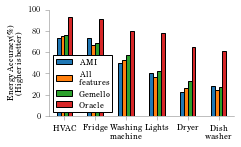

In [70]:
sen.plot(kind="bar",rot=0, colors=tableau20blind[::2])
format_axes(plt.gca())
plt.legend(loc=3)
plt.ylabel("Energy Accuracy(\%)\n(Higher is better)");
plt.tight_layout()
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/sensitivity-features.pdf",bbox_inches="tight")
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/sensitivity-features.png",bbox_inches="tight")

Why fridge improves with AMI

In [109]:
to_use_feature

{'dr': 'Monthly+Static',
 'dw': 'Monthly+Static',
 'fridge': 'Monthly+Static',
 'hvac': 'Monthly',
 'light': 'Static',
 'wm': 'Static'}

In [121]:
from collections import Counter
import json
appliance="dr"
feature="Monthly+Static"
out={}
means = {}
sems = {}

for appliance, feature in to_use_feature.iteritems():
    out[appliance]=Counter()
    for home in all_homes[appliance]:
        try:
            j = json.load(open("../main-out-new/%s_%s_%d.json" %(appliance, feature, home),'r'))
            
            out[appliance].update(j['f'])
        except:
            pass
                                     
                
           


In [136]:
pd.Series(out['dw'])

aggregate_1        20
aggregate_10        4
aggregate_11       16
aggregate_12       24
aggregate_5        11
aggregate_6         2
aggregate_7         6
aggregate_8         2
num_rooms           1
total_occupants    13
dtype: int64

In [139]:
20./26

0.7692307692307693

,kurtosis,fridge_5
kurtosis,1.000000,0.154295
fridge_5,0.154295,1.000000


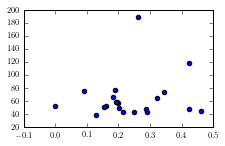

In [185]:
fr = 'kurtosis'
a = df.ix[all_homes['fridge']][[fr,'fridge_5']]
#a = a.query('fridge_7<100')
plt.scatter(a[fr],a['fridge_5'])
#plt.ylim((0, 100))
df.ix[all_homes['fridge']][[fr,'fridge_5']].corr()

In [177]:
o = {}
for f in ['difference_min_max']:
    o[f]={}
    for month in range(1, 13):
        o[f][month] = df.ix[all_homes['fridge']][[f,'fridge_%d' %month]].corr().values[0, 1]
    

In [178]:
pd.DataFrame(o).mean()

difference_min_max    0.022031
dtype: float64

In [175]:
from collections import Counter
import json
appliance="fridge"
feature="Monthly"
out={}
means = {}
sems = {}

c=Counter()
for home in all_homes[appliance]:
    try:
        j = json.load(open("../main-out-new/%s_%s_%d.json" %(appliance, feature, home),'r'))

        c.update(j['f'])
    except:
        pass
                                     
                
           


In [176]:
pd.Series(c)

aggregate_10                 1
aggregate_11                 4
aggregate_4                 15
aggregate_5                 10
aggregate_6                  4
aggregate_9                  6
difference_min_max          20
kurtosis                     8
p_50                         2
p_75                         5
ratio_difference_min_max     8
ratio_min_max                4
dtype: int64

In [ ]:
df